We implement a k means clustering algorithm to explore CDIP data. Our goal is to determine if the algorithm can partition the data well.

In [42]:
import sklearn
import netCDF4
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

# Load some CDIP data

In [11]:
stn = '067'
yeardate = '2011'
data_url = 'http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/archive/' + stn + 'p1/' + stn + 'p1_historic.nc'
nc = netCDF4.Dataset(data_url)

In [40]:
waveHeight = nc.variables['waveHs']
wavePeriod = nc.variables['waveTa']

# check same dimensions
assert(wavePeriod.shape == waveHeight.shape)

In [23]:
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
X.shape

(6, 2)

In [36]:
waveHeightFrequency = np.column_stack((waveHeight, wavePeriod))
waveHeightFrequency[1:5]

masked_array(
  data=[[1.59     , 7.3875666],
        [1.54     , 7.2613387],
        [1.57     , 7.102014 ],
        [1.31     , 5.411871 ]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

# Implement K Means Clustering of Wave Height and Average Wave Period

In [55]:
kmeans = KMeans(n_clusters = 5, random_state = 0).fit(waveHeightFrequency)
y_kmeans = kmeans.predict(waveHeightFrequency)

# Scatterplot of Wave Height vs Average Wave Bound colored by predicted k-means class

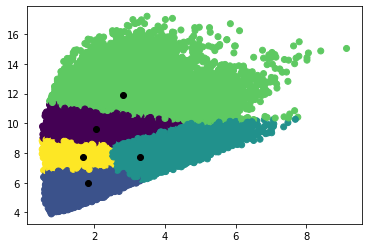

In [58]:
plt.scatter(waveHeightFrequency[:, 0], waveHeightFrequency[:, 1], c = y_kmeans, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black')